In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform,RobustScaler,PowerTransformer,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import datasets
from keras import models
from keras import layers
from keras import optimizers
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
import pickle

In [9]:
df=pd.read_csv("/content/part-00000-9eb8133c-407f-47c6-918f-905dc2d5fbea-c000.csv")
df.head()

,Age,Annual_Income,Number_of_Dependents,Health_Score,Previous_Claims,Vehicle_Age,Credit_Score,Insurance_Duration,Premium_Amount,Year,...,Gender_Index,Marital_Status_Index,Education_Level_Index,Occupation_Index,Location_Index,Policy_Type_Index,Customer_Feedback_Index,Smoking_Status_Index,Exercise_Frequency_Index,Property_Type_Index
0,36.0,1054.0,1.0,37.627622,0.0,1.0,472.0,6.0,724.0,2020.0,...,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0
1,41.0,38156.0,2.0,42.918900,2.0,1.0,774.0,5.0,997.0,2021.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0,1.0
2,28.0,68736.0,1.0,44.493047,1.0,4.0,561.0,8.0,2044.0,2022.0,...,0.0,2.0,3.0,0.0,1.0,1.0,2.0,1.0,3.0,2.0
3,24.0,29173.0,2.0,39.441569,1.0,19.0,764.0,3.0,783.0,2022.0,...,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,52.0,17883.0,0.0,30.592913,0.0,2.0,431.0,9.0,1136.0,2022.0,...,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0


In [10]:
features=['Occupation_Index','Previous_Claims','Year','Smoking_Status_Index','Location_Index']
target_col='Premium_Amount'

(array([94466., 67830., 41540., 19508., 14388.,  9283.,  7549.,  4547.,
         5115.,  3442.]),
 array([2.000000e+00, 1.500150e+04, 3.000100e+04, 4.500050e+04,
        6.000000e+04, 7.499950e+04, 8.999900e+04, 1.049985e+05,
        1.199980e+05, 1.349975e+05, 1.499970e+05]),
 <BarContainer object of 10 artists>)

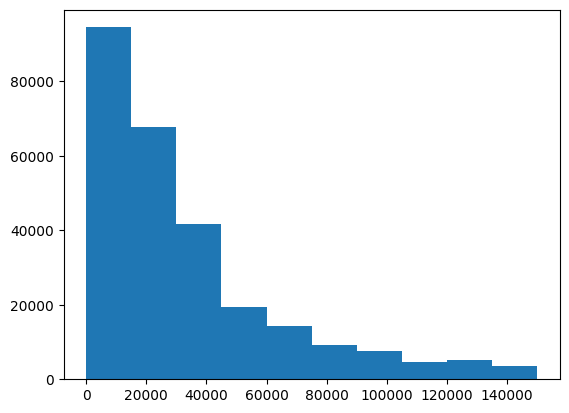

In [11]:
plt.hist(df['Annual_Income'])

(array([65891., 86110., 48621., 25180., 19799., 11041.,  6419.,  2798.,
          964.,   845.]),
 array([  20. ,  517.4, 1014.8, 1512.2, 2009.6, 2507. , 3004.4, 3501.8,
        3999.2, 4496.6, 4994. ]),
 <BarContainer object of 10 artists>)

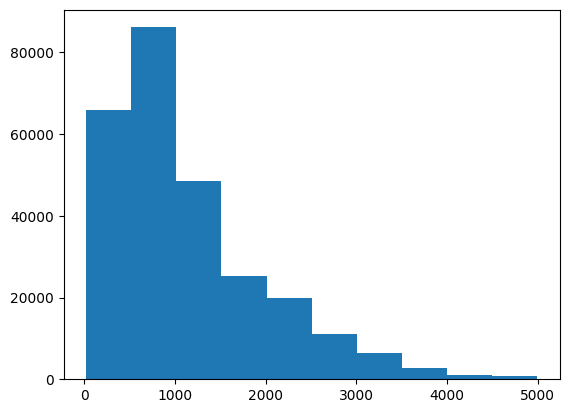

In [12]:
plt.hist(df['Premium_Amount'])

(array([ 10828.,   2909.,   2862.,   4324.,   3509.,   4554.,   6193.,
         36627.,  64044., 131818.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01,  1.87093785e-10,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01,  1.00000000e+00]),
 <BarContainer object of 10 artists>)

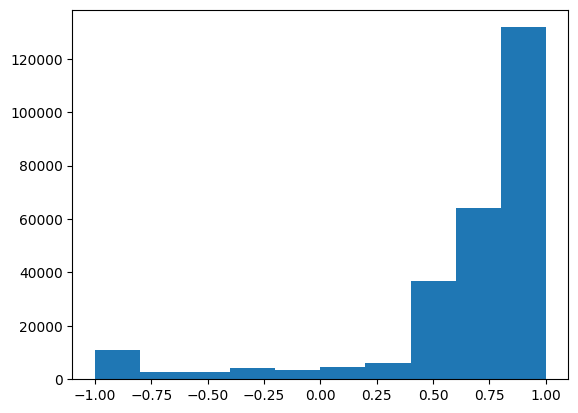

In [13]:
scaler = StandardScaler()
Annual_scaled=scaler.fit_transform(pd.DataFrame(df["Annual_Income"],columns=["Annual_Income"]))
plt.hist(np.cos(Annual_scaled))

(array([75625., 46346., 27433., 30113., 18217., 16833., 13410., 14274.,
        15856.,  9561.]),
 array([-9.99999999e-01, -8.00000041e-01, -6.00000083e-01, -4.00000126e-01,
        -2.00000168e-01, -2.10254956e-07,  1.99999747e-01,  3.99999705e-01,
         5.99999663e-01,  7.99999620e-01,  9.99999578e-01]),
 <BarContainer object of 10 artists>)

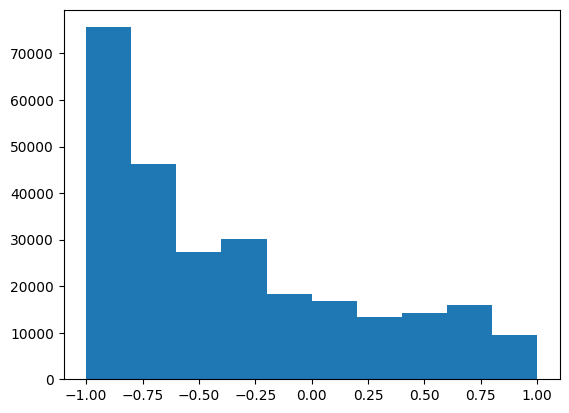

In [14]:
Annual_Income_Scaled=np.cos(np.log(df["Annual_Income"]))
#Annual_Income_Scaled = np.where(Annual_Income_Scaled< 20000,
#                           np.cbrt(Annual_Income_Scaled),
#                           np.sqrt(Annual_Income_Scaled))
plt.hist(Annual_Income_Scaled)

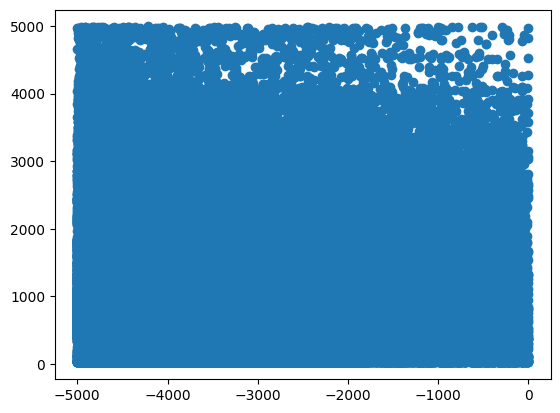

In [15]:
income_scaler = MinMaxScaler(feature_range=(1, 5000))


income_scaled = income_scaler.fit_transform(pd.DataFrame(df["Annual_Income"]))
plt.scatter(income_scaled-5000,df["Premium_Amount"])

In [16]:
numbers = np.array([1, 8, 27, 64])
cube_roots = np.cbrt(numbers)
cube_roots

array([1., 2., 3., 4.])

In [17]:
# Initialize scalers
income_scaler = MinMaxScaler(feature_range=(1, 5000))

# Transform income to premium range (1-5000)
income_scaled = income_scaler.fit_transform(pd.DataFrame(df["Annual_Income"]))

# Calculate weighted premium based on scaled income
# This ensures higher income leads to higher premium
alpha = 0.7  # Weight factor for income influence
beta = 0.3   # Weight factor for random variation

# Add small random variation to avoid perfect correlation
random_factor = np.random.uniform(0.95, 1.05, size=income_scaled.shape)

# Combine scaled income with random variation
transformed_premium = (alpha * income_scaled +
                         beta * income_scaled * random_factor)

# Ensure transformed premium stays within original range
premium_scaler = MinMaxScaler(feature_range=(1, 5000))
transformed_premium = premium_scaler.fit_transform(transformed_premium)


transformed_premium
# Calculate correlation coefficient
correlation = np.corrcoef(income_scaled.flatten(),
                           transformed_premium.flatten())[0,1]
correlation

0.9999237230905595

In [18]:
np.corrcoef(df['Premium_Amount'],df["Previous_Claims"])[0,1]

0.03543999031658922

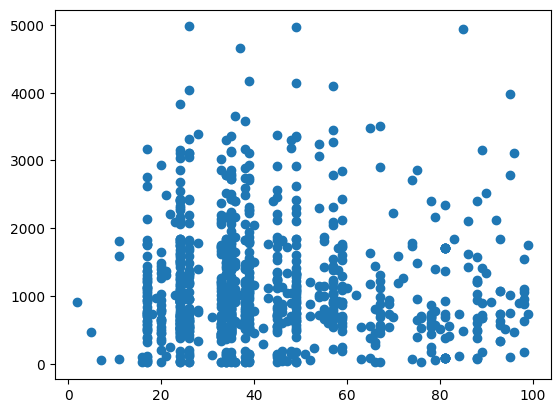

In [19]:
sample=df[df['Annual_Income'] <100]
plt.scatter(y=sample['Premium_Amount'],x=sample['Annual_Income'])

In [20]:
for col in df.columns:
    if col!=target_col:
      print(col," ",np.corrcoef(df['Premium_Amount'],df[col])[0,1])

Age   -0.004155664598459613
Annual_Income   -0.014546605878845325
Number_of_Dependents   -0.0006174334004998143
Health_Score   0.012147158765226568
Previous_Claims   0.03543999031658922
Vehicle_Age   0.00013966202858204573
Credit_Score   -0.024824427610346467
Insurance_Duration   -0.003106310606557949
Year   -0.011132148337893097
Day   0.00034505529021445645
Month   0.004737354561832195
Gender_Index   -0.001100898281864633
Marital_Status_Index   -0.0012663228608375836
Education_Level_Index   6.572776059695008e-05
Occupation_Index   -0.0015850596214528742
Location_Index   0.0029634680726200982
Policy_Type_Index   0.0010349108148494587
Customer_Feedback_Index   0.0001401108422806317
Smoking_Status_Index   -0.00468512714769523
Exercise_Frequency_Index   0.0018393305887797456
Property_Type_Index   -0.0006995543841426515


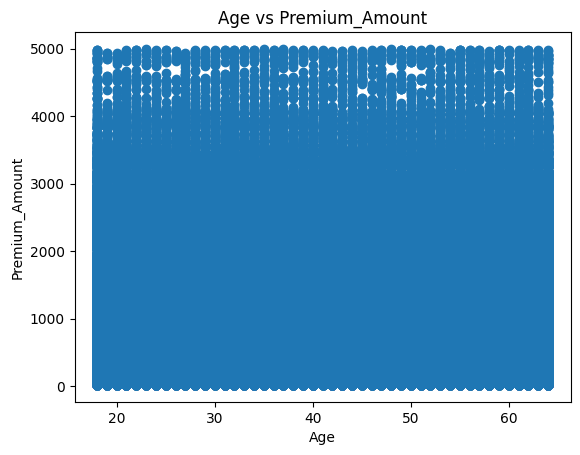

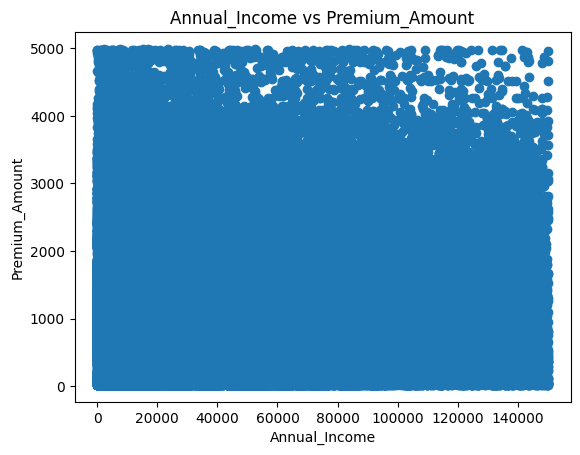

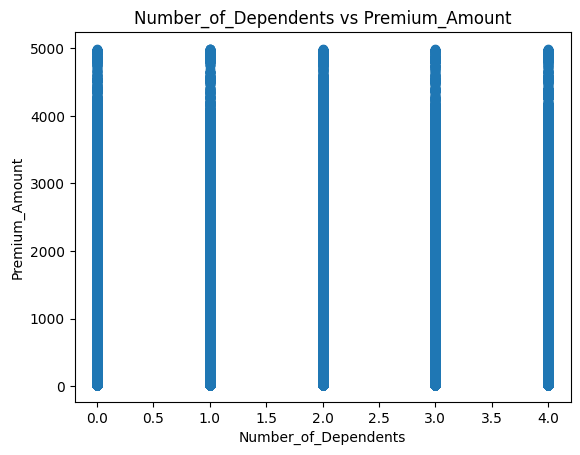

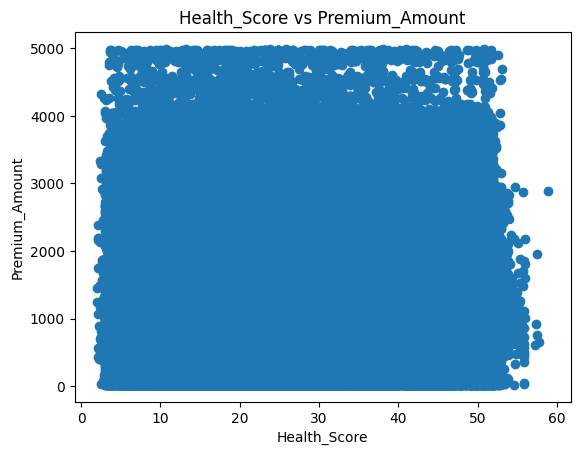

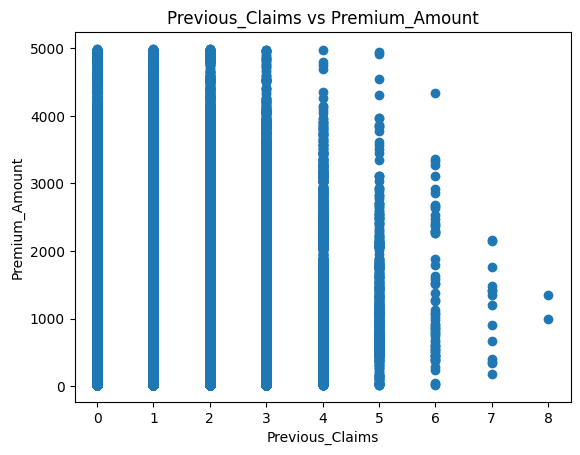

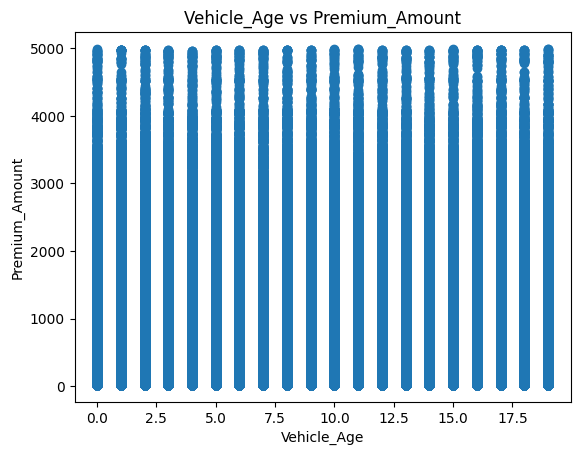

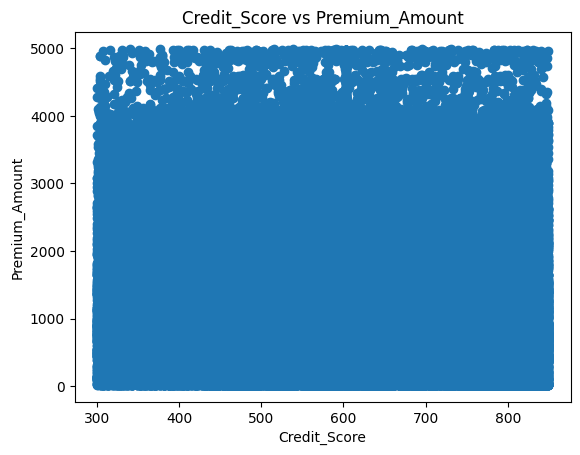

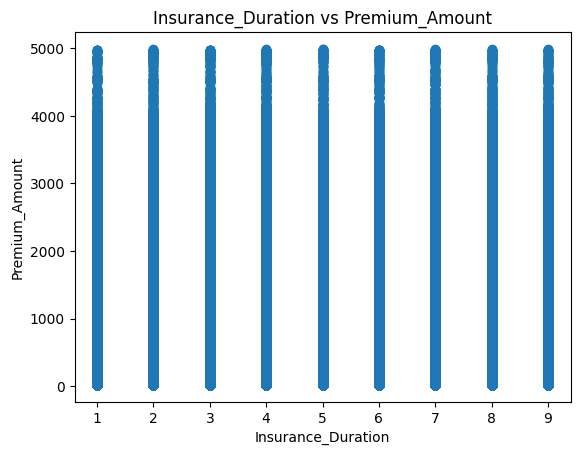

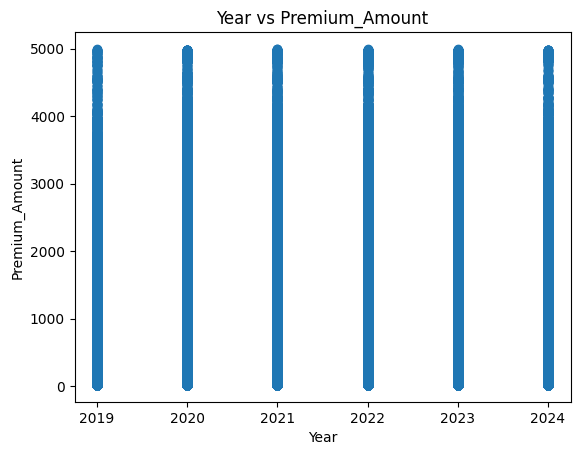

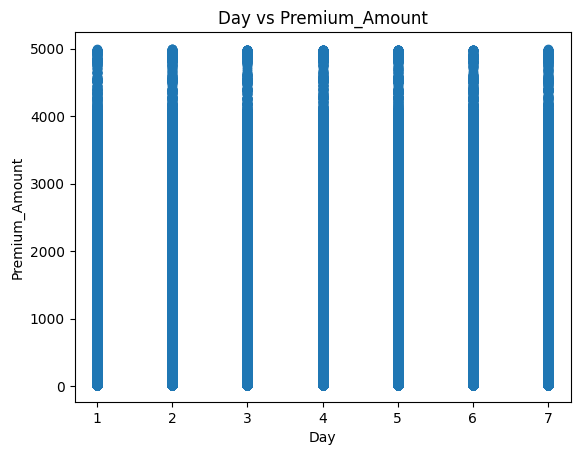

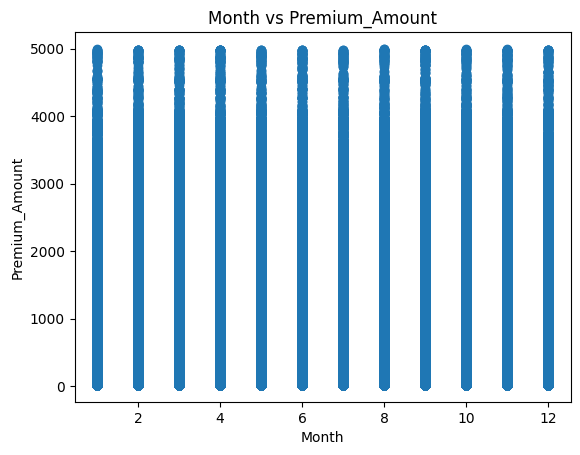

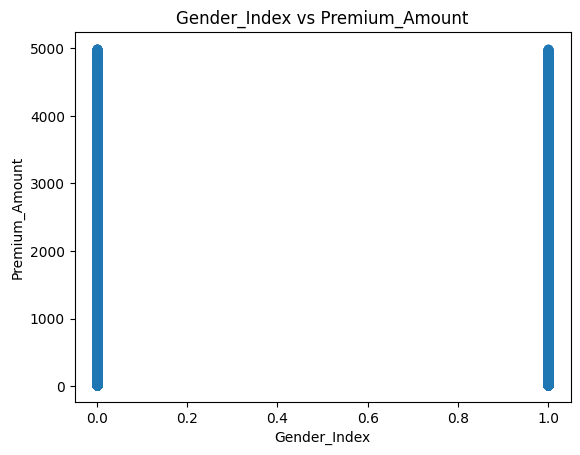

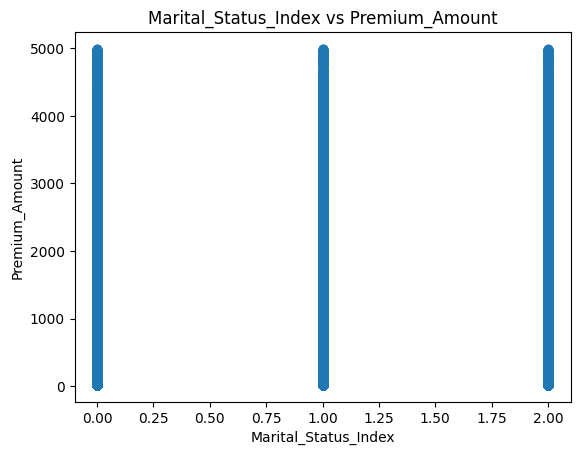

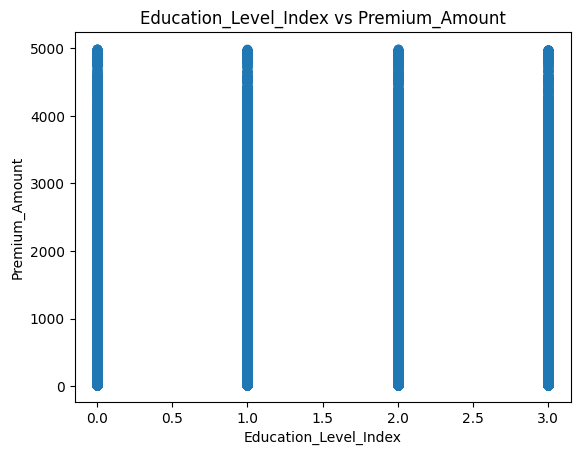

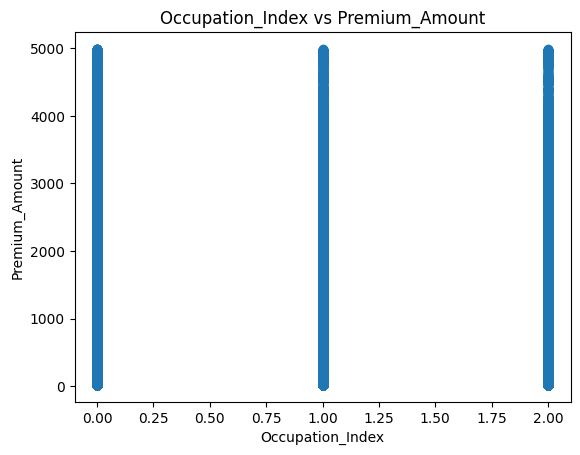

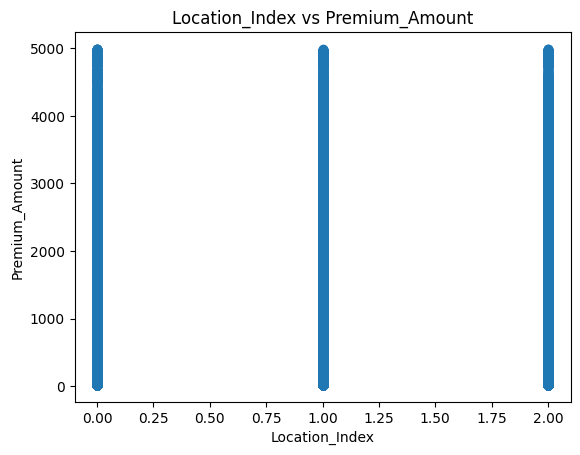

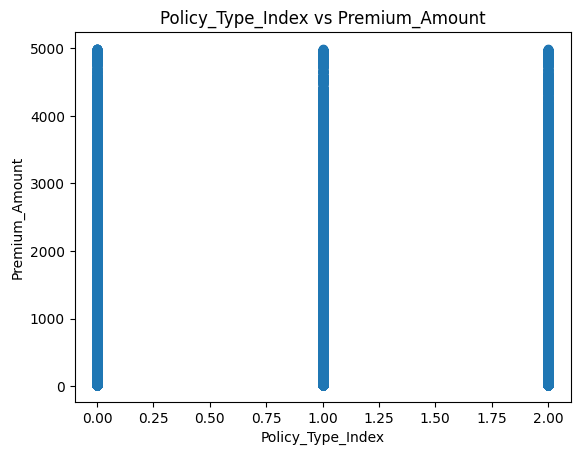

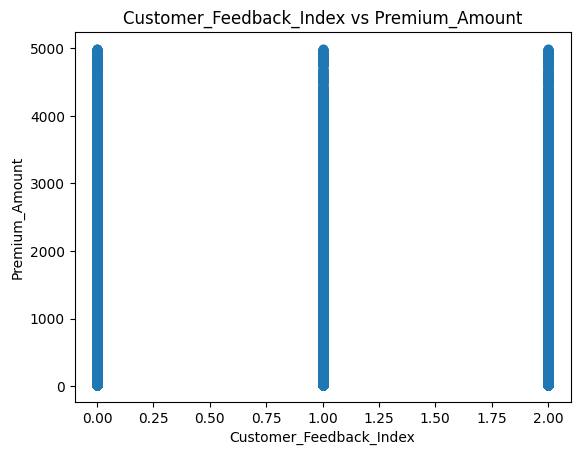

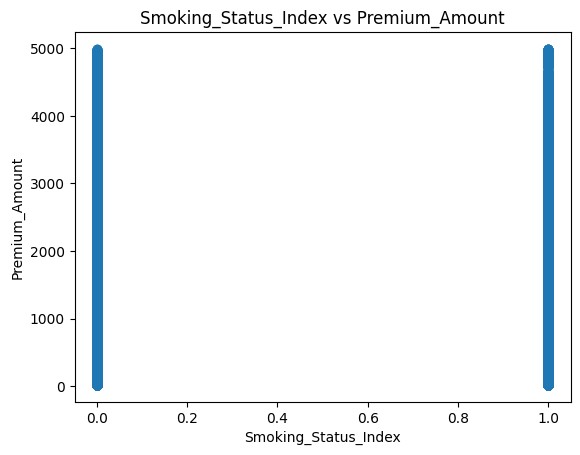

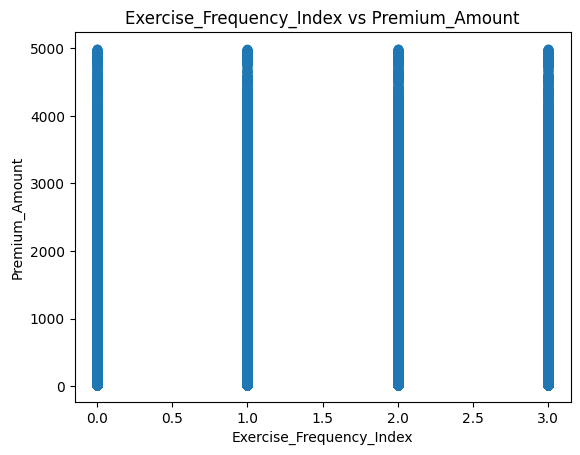

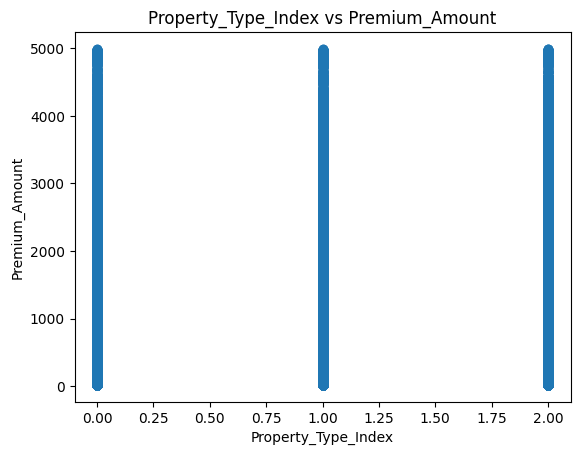

<Figure size 640x480 with 0 Axes>

In [21]:
for col in df.columns:
    if col!=target_col:
      plt.scatter(y=df[target_col],x=df[col])
      plt.title(f'{col} vs {target_col}')
      plt.xlabel(col)
      plt.ylabel(target_col)
      plt.show()
      plt.savefig(f"{col} vs {target_col}.png")


In [22]:
df_copy=df.copy()

In [23]:
import pandas as pd

# def scale_premium_for_row(row):
#   premium = row['Premium_Amount']
#   if 0 <= premium <= 1000:
#     base_income = (premium / 1000) * 40000
#   elif 1000 < premium <= 2000:
#     base_income = 40000 + ((premium - 1000) / 1000) * 30000
#   elif 2000 < premium <= 3000:
#     base_income = 70000 + ((premium - 2000) / 1000) * 40000
#   elif 3000 < premium <= 4000:
#     base_income = 110000 + ((premium - 3000) / 1000) * 30000
#   else: # Premium between 4000 and 5000
#     base_income = 140000 + ((premium - 4000) / 1000) * 10000
#   noise=0
#   if np.random.rand() < 0.005 and base_income<100000:
#     noise = np.random.uniform(-40000,40000)
#   return abs(base_income + noise)
def scale_premium_for_row(row):
  """
  Scales the Annual Income
  """
  premium = row['Premium_Amount']
  if 0 <= premium <= 1000:
    base_income = 140000 - ((premium / 1000) * 40000)
  elif 1000 < premium <= 2000:
    base_income = 110000 - (((premium - 1000) / 1000) * 30000)
  elif 2000 < premium <= 3000:
    base_income = 70000 - (((premium - 2000) / 1000) * 40000)
  elif 3000 < premium <= 4000:
    base_income = 40000 - (((premium - 3000) / 1000) * 30000)
  else: # Premium between 4000 and 5000
    base_income = 10000 - (((premium - 4000) / 1000) * 10000)
  noise=0
  if np.random.rand() < 0.005 and base_income<100000:
    noise = np.random.uniform(-40000,40000)
  return abs(base_income + noise)
df_copy['Annual_Income'] = df_copy.apply(scale_premium_for_row, axis=1)

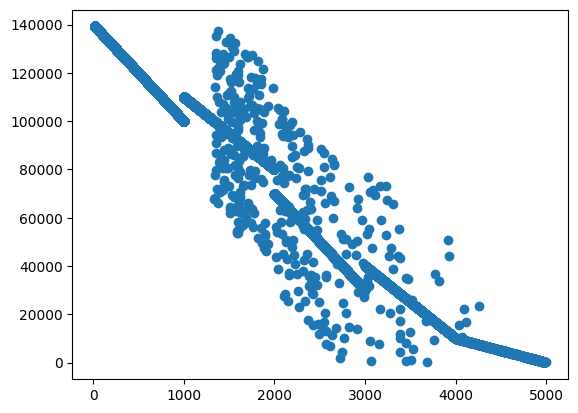

In [24]:
plt.scatter(df_copy[target_col],df_copy["Annual_Income"])

In [25]:
features

['Occupation_Index',
 'Previous_Claims',
 'Year',
 'Smoking_Status_Index',
 'Location_Index']

In [26]:
min(df_copy['Previous_Claims']),max(df_copy['Previous_Claims'])

(0.0, 8.0)

In [27]:
max(df_copy["Premium_Amount"])

4994.0

In [28]:
import pandas as pd
import numpy as np
def get_num_claims(row):
    """
    Determines a random number of claims based on the insurance amount.
    """
    insurance_amount = row['Premium_Amount']
    claims=0
    if 0 <= insurance_amount < 1000:  #Based on range used in the original code
      claims=np.random.randint(0, 3)  # Returns a random integer between 0 (inclusive) and 3 (exclusive).
    elif 1000 <= insurance_amount < 2000: #Based on range used in the original code
      claims=np.random.randint(3, 6) # Returns a random integer between 3 (inclusive) and 6 (exclusive).
    elif 2000 <= insurance_amount < 3000: #Based on range used in the original code
      claims=np.random.randint(5, 7)  # Returns a random integer between 5 (inclusive) and 7 (exclusive).
    elif 3000 <= insurance_amount <= 5400: #Based on range used in the original code
      claims=np.random.randint(7, 9) # Returns a random integer between 7 (inclusive) and 9 (exclusive).
    noise=0
    if np.random.rand() < 0.005:
      noise = np.random.uniform(-1,1)
    return int(claims+noise/8)

df_copy['Previous_Claims'] = df_copy.apply(get_num_claims, axis=1)

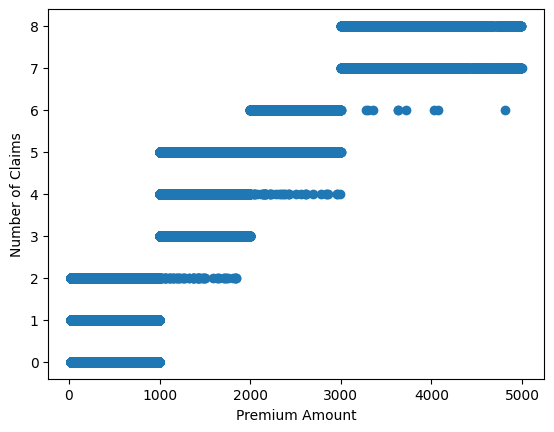

In [32]:
plt.scatter(df_copy[target_col],df_copy["Previous_Claims"])
plt.xlabel("Premium Amount")
plt.ylabel("Number of Claims")
plt.savefig("Previous Claims vs Premium Amount Scaled.png")

In [ ]:
max(df_copy["Credit_Score"])

849.0

In [39]:
def get_credit_score(row):
    """
    Determines a random credit score based on the insurance amount.
    """
    insurance_amount = row['Premium_Amount']
    credit_score=0
    if 0 <= insurance_amount < 1000:
      credit_score=np.random.randint(700, 853)

    elif 1000 <= insurance_amount < 2000:
      credit_score=np.random.randint(600, 700)

    elif 2000 <= insurance_amount < 3000:
      credit_score=np.random.randint(500, 600)

    elif 3000 <= insurance_amount <= 5400:
      credit_score=np.random.randint(300, 500)
    return credit_score
df_copy['Credit_Score'] = df_copy.apply(get_credit_score, axis=1)
    #if np.random.rand() < 0.005:
    #  noise = np.random.uniform(-100,100)
    #  credit_score+=noise
    #  return ((credit_score-300)/524)*524+300




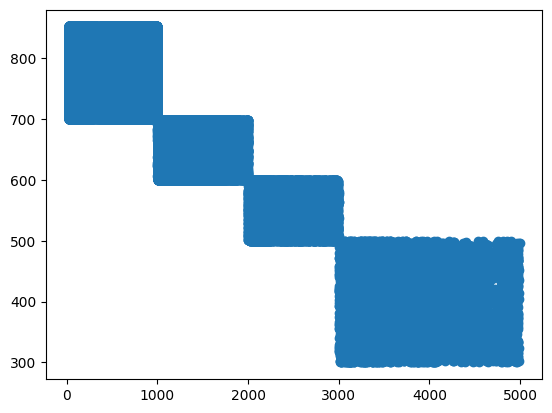

In [40]:
plt.scatter(df_copy[target_col],df_copy["Credit_Score"])

In [ ]:
max(df['Health_Score'])

58.88603450603597

In [41]:
import pandas as pd
def get_health_score(row):
  """
  Determines a random health score based on the insurance amount.
  """
  insurance_amount = row['Premium_Amount']
  if 0 <= insurance_amount < 1000:  # Lower insurance amount
      amt=np.random.randint(45, 59)  # High health score range
      if np.random.rand() < 0.005:
        noise = np.random.uniform(-3,0)
        return   amt+noise# Lower-moderate health score range
      return amt

  elif 1000 <= insurance_amount < 2000:
      amt=np.random.randint(30, 45)  # Moderate health score range
      if np.random.rand() < 0.005:
        noise = np.random.uniform(-3,3)
        return   amt+noise# Lower-moderate health score range
      return amt

  elif 2000 <= insurance_amount < 3000:
    amt=np.random.randint(15, 30)
    if np.random.rand() < 0.005:
      noise = np.random.uniform(-3,3)
      return   amt+noise# Lower-moderate health score range
    return amt

  elif 3000 <= insurance_amount <= 5400:
    amt=np.random.randint(0, 15)
    if np.random.rand() < 0.005:
      noise = np.random.uniform(0,3)
      return amt+noise
    return amt   #Low health score range
df_copy['Health_Score'] = df_copy.apply(get_health_score,axis=1)

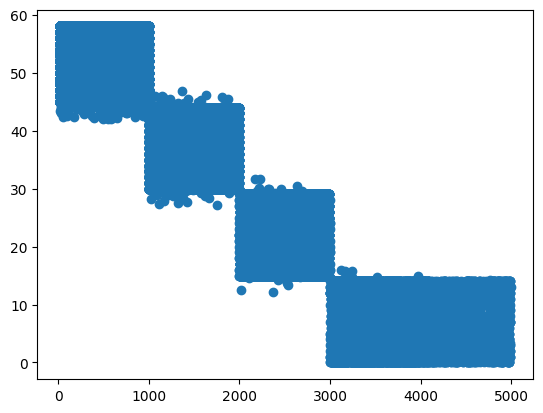

In [42]:
plt.scatter(df_copy[target_col],df_copy["Health_Score"])

In [43]:
min(df_copy['Age'])

18.0

In [44]:
def age_score(row):
  insurance_amount=row['Premium_Amount']
  if 4000 <= insurance_amount < 5400:
    return np.random.randint(50, 65)
  elif 0 <= insurance_amount < 2000:
    return np.random.randint(26, 40)
  elif 2000 <= insurance_amount < 3000:
    return np.random.randint(41,50)
  elif 3000 <= insurance_amount <4000:
    return np.random.randint(18, 25)
df_copy['Age'] = df_copy.apply(age_score,axis=1)

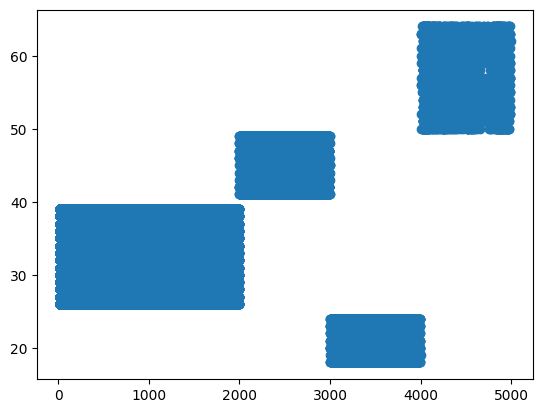

In [45]:
plt.scatter(df_copy[target_col],df_copy["Age"])

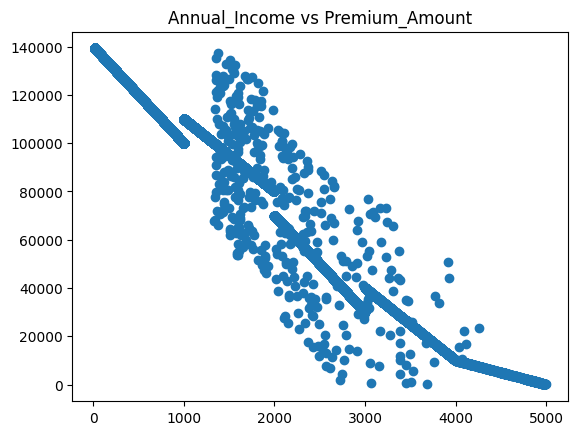

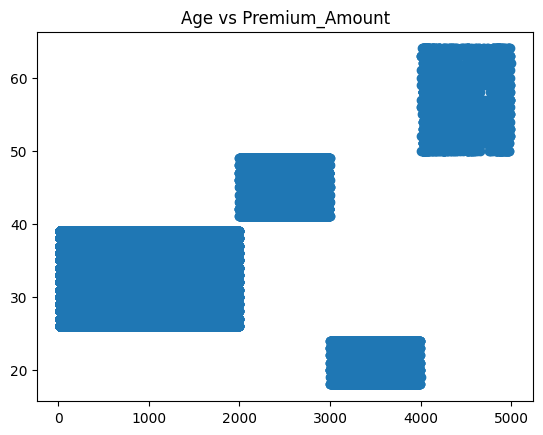

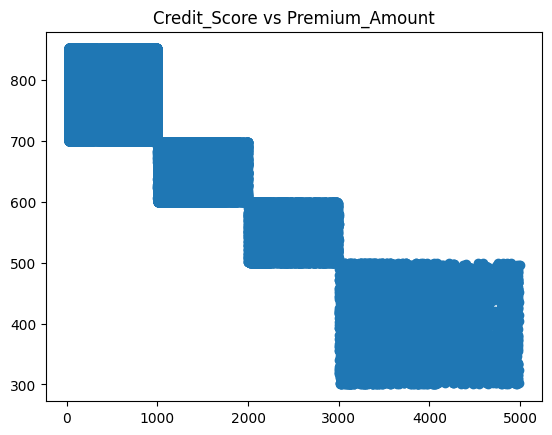

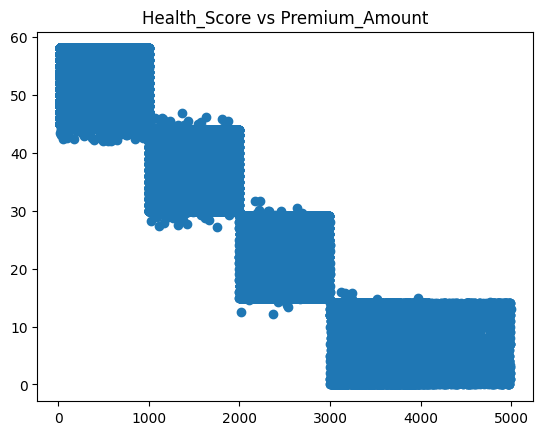

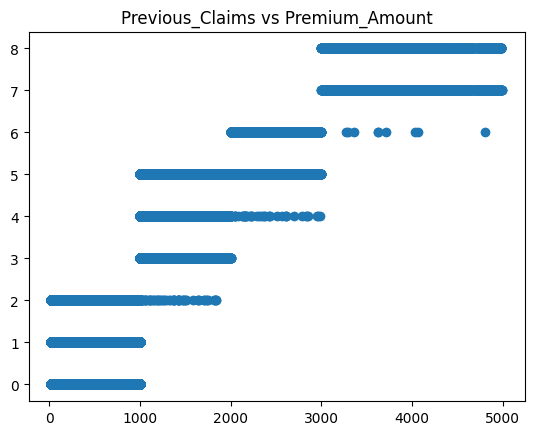

In [46]:
features_final=['Annual_Income','Age','Credit_Score','Health_Score','Previous_Claims']
target_col='Premium_Amount'
for col in features_final:
  plt.scatter(df_copy[target_col],df_copy[col])
  plt.title(f'{col} vs {target_col}')
  plt.show()

## Model Building

#X and y

In [47]:
X=df_copy[features_final]
y = df_copy[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
X.describe()

,Annual_Income,Age,Credit_Score,Health_Score,Previous_Claims
count,267668.000000,267668.000000,267668.000000,267668.000000,267668.000000
mean,101835.229425,33.715390,698.746940,42.175011,2.628435
std,28241.855314,6.324087,108.872729,13.099578,2.134361
min,36.983318,18.000000,300.000000,0.000000,0.000000
25%,94610.000000,29.000000,633.000000,34.000000,1.000000
50%,107440.000000,33.000000,716.000000,46.000000,2.000000
75%,119120.000000,37.000000,784.000000,52.000000,5.000000
max,139200.000000,64.000000,852.000000,58.000000,8.000000


In [49]:
#Defining list for rmse and r^2 score to visualize matrix
rmse_list=[]
rmse_list.append(850)
mae_list=[]
r2_score_list=[]
r2_score_list.append("NA")
mae_list.append("NA")
model_list=["Kaggle Competition","Linear Regresion","Lasso","XG Boost","Decision Tree Regressor","CatBoost"]

## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) #Calculate MSE [2][5]
mae = mean_absolute_error(y_test, y_pred) #Calculate MAE [2][5]
lr_rmse = np.sqrt(mse) #Calculate RMSE [2]
lr_r2_score=r2_score(y_test, y_pred)



print("Mean Squared Error (MSE):", mse) #Prints MSE
print("Mean Absolute Error (MAE):", mae) #Prints MAE [2]
print("Root Mean Squared Error (RMSE):", lr_rmse) # Prints RMSE
print("R-squared (R^2):", lr_r2_score)

print("Coefficients:", lr_model.coef_)  #Prints the coefficient [2]
print("Intercept:", lr_model.intercept_)
rmse_list.append(lr_rmse)
r2_score_list.append(lr_r2_score)
mae_list.append(mae)
with open("linear_regression_model.pkl", 'wb') as file: #wb for write binary [1][2]
    pickle.dump(lr_model, file)

Mean Squared Error (MSE): 10643.620681601431
Mean Absolute Error (MAE): 72.43990297057465
Root Mean Squared Error (RMSE): 103.16792467429705
R-squared (R^2): 0.9858222979500761
Coefficients: [-2.51991050e-02 -3.69930709e+00 -4.90169036e-01 -2.38757234e+00
  4.34591306e+01]
Intercept: 4128.196129856675


## Lasso Regression

In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = lasso.predict(X_test)

# 5. Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = np.sqrt(mse)
lasso_r2_score=r2_score(y_test, y_pred)

# 6. Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", lasso_rmse)
print("R-squared (R^2):", lasso_r2_score)
mae_list.append(mae)
rmse_list.append(lasso_rmse)
r2_score_list.append(lasso_r2_score)
with open("lasso_regression_model.pkl", 'wb') as file: #wb for write binary [1][2]
    pickle.dump(lasso, file)

Mean Squared Error (MSE): 10643.714292952267
Mean Absolute Error (MAE): 72.43512982084746
Root Mean Squared Error (RMSE): 103.16837835767444
R-squared (R^2): 0.9858221732562449


## XG Boost

In [52]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', #Objective is a required parameter [1]
                               n_estimators=100, #Number of boosting iterations [1]
                               random_state=42) # for reproducibility

xg_reg.fit(X_train, y_train) #Fit the model [1]

# 4. Make predictions on the test set [1]
y_pred = xg_reg.predict(X_test)

# 5. Calculate metrics [1][2]
mse = mean_squared_error(y_test, y_pred) #Calculate MSE [1]
mae = mean_absolute_error(y_test, y_pred) #Calculate MAE [1]
xg_reg_rmse = np.sqrt(mse) #Calculate RMSE [1]
xg_r2_score=r2_score(y_test, y_pred)

# 6. Print the metrics [1]
print("Mean Squared Error (MSE):", mse) #Prints MSE [1]
print("Mean Absolute Error (MAE):", mae) #Prints MAE [1]
print("Root Mean Squared Error (RMSE):", xg_reg_rmse) #Prints RMSE [1]
print("R-squared (R^2):", xg_r2_score)
rmse_list.append(xg_reg_rmse)
r2_score_list.append(xg_r2_score)
mae_list.append(mae)
with open("xg_regression_model.pkl", 'wb') as file: #wb for write binary [1][2]
    pickle.dump(xg_reg, file)

Mean Squared Error (MSE): 502.10450562396477
Mean Absolute Error (MAE): 5.27571962746132
Root Mean Squared Error (RMSE): 22.407688538177354
R-squared (R^2): 0.999331177961747


## Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42, criterion="friedman_mse") # other options are ‘mae’ and ‘poisson’ [1]
dt_reg.fit(X_train, y_train)

# 4. Make predictions on the test set [1]
y_pred = dt_reg.predict(X_test)

# 5. Calculate metrics [1]
mse = mean_squared_error(y_test, y_pred) #Calclate MSE [1][3]
mae = mean_absolute_error(y_test, y_pred) #Calculate MAE [1][3]
dt_reg_rmse = np.sqrt(mse) #Calculate RMSE [1][3]
dt_reg_r2_score=r2_score(y_test, y_pred)

# 6. Print the metrics [1]
print("Mean Squared Error (MSE):", mse) #Print MSE [1]
print("Mean Absolute Error (MAE):", mae) #Print MAE [1]
print("Root Mean Squared Error (RMSE):", dt_reg_rmse)
print("R-squared (R^2):", dt_reg_r2_score)
rmse_list.append(dt_reg_rmse)
r2_score_list.append(dt_reg_r2_score)
mae_list.append(mae)
with open("decision_tree__regression_model.pkl", 'wb') as file: #wb for write binary [1][2]
    pickle.dump(dt_reg, file)

Mean Squared Error (MSE): 249.1787462173572
Mean Absolute Error (MAE): 0.46701161878432396
Root Mean Squared Error (RMSE): 15.785396612608668
R-squared (R^2): 0.9996680845619432


## CatBoost

In [54]:
#Prerequisite
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [55]:
from catboost import CatBoostRegressor

In [56]:
cat_model = CatBoostRegressor(iterations=500, #Number of boosting iterations
                               depth=10, #Depth of the tree
                               learning_rate=0.05, #Learning rate
                               loss_function='RMSE', #Loss function [1]
                               random_seed=42, #Random seed for reproducibility
                               logging_level='Silent') # Suppress verbose output [1]

cat_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = cat_model.predict(X_test)

# 5. Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
cat_rmse = np.sqrt(mse)
cat_r2_score=r2_score(y_test, y_pred)

# 6. Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", cat_rmse)
print("R-squared (R^2):", cat_r2_score)
rmse_list.append(cat_rmse)
r2_score_list.append(cat_r2_score)
mae_list.append(mae)
with open("catboost__regression_model.pkl", 'wb') as file: #wb for write binary [1][2]
    pickle.dump(cat_model, file)

Mean Squared Error (MSE): 418.5501607131382
Mean Absolute Error (MAE): 6.082379122565886
Root Mean Squared Error (RMSE): 20.458498496056308
R-squared (R^2): 0.9994424754837612


## Ploting Results

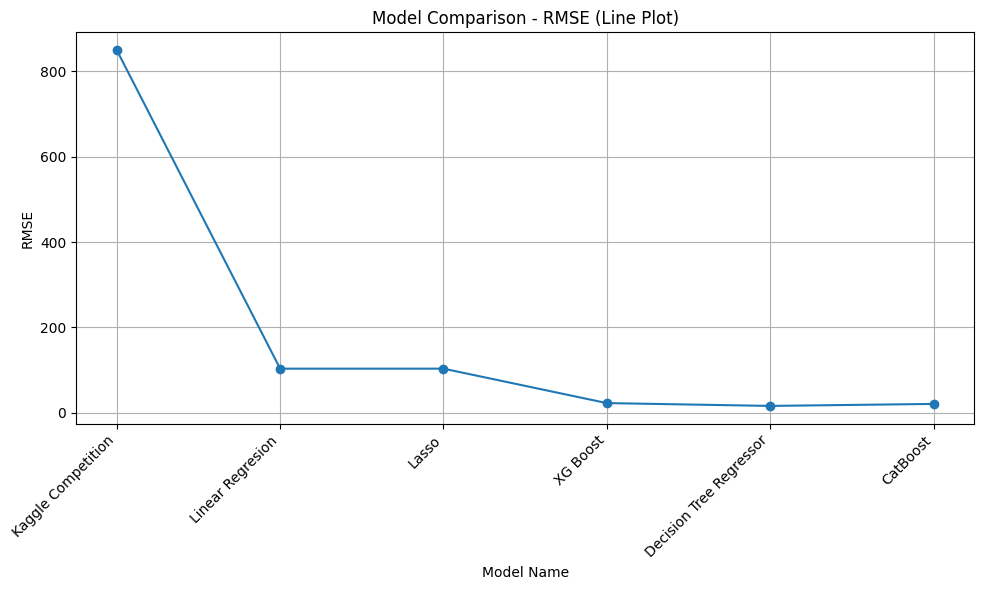

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize=(10, 6))  # Create a figure and axes [1]
plt.plot(model_list, rmse_list, marker='o', linestyle='-')  # Create the line plot [1]
plt.xlabel("Model Name")  # Set the x-axis label [1]
plt.ylabel("RMSE")  # Set the y-axis label [1]
plt.title("Model Comparison - RMSE (Line Plot)")  # Set the title [1]
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability [1]
plt.grid(True)  # Add grid lines [1]
plt.tight_layout()  # Adjust the plot to fit the labels [1]
plt.show()  # Show the plot [1]
plt.savefig("RMSE Model Comparsion")

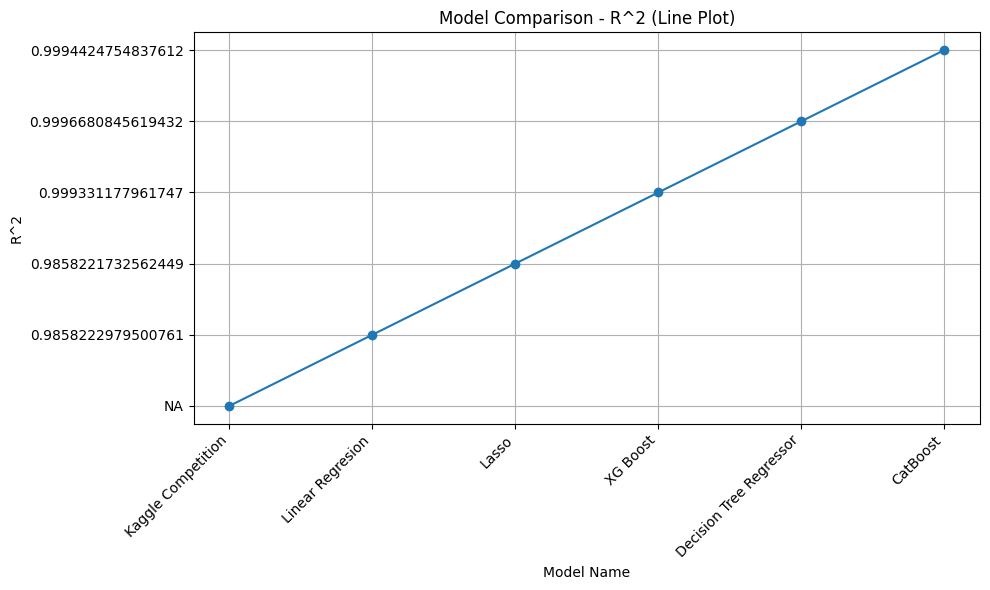

<Figure size 640x480 with 0 Axes>

In [61]:
plt.figure(figsize=(10, 6))  # Create a figure and axes [1]
plt.plot(model_list, r2_score_list, marker='o', linestyle='-')  # Create the line plot [1]
plt.xlabel("Model Name")  # Set the x-axis label [1]
plt.ylabel("R^2")  # Set the y-axis label [1]
plt.title("Model Comparison - R^2 (Line Plot)")  # Set the title [1]
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability [1]
plt.grid(True)  # Add grid lines [1]
plt.tight_layout()  # Adjust the plot to fit the labels [1]
plt.show()  # Show the plot [1]
plt.savefig("R^2 Model Comparsion")

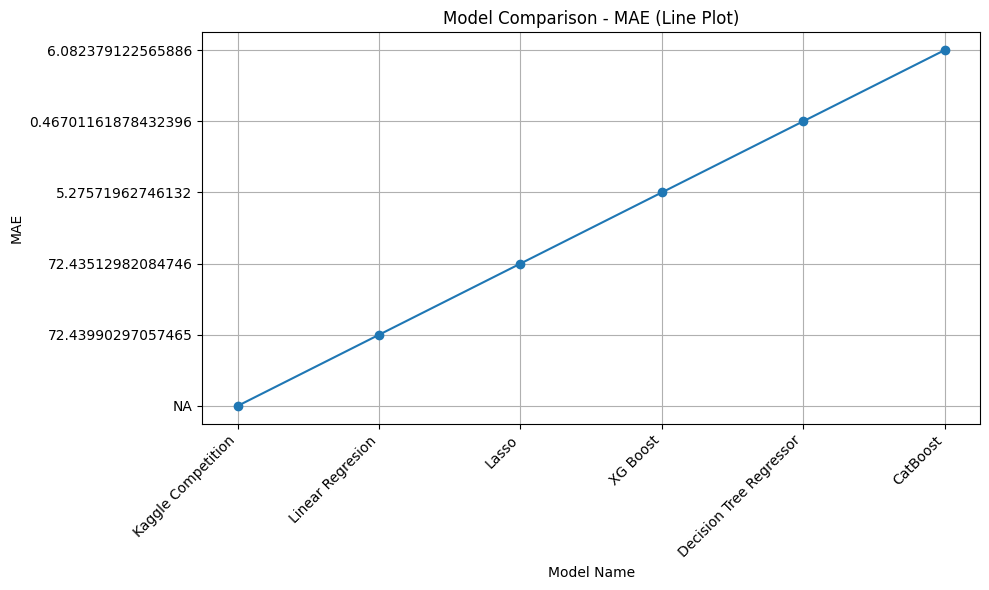

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize=(10, 6))  # Create a figure and axes [1]
plt.plot(model_list, mae_list, marker='o', linestyle='-')  # Create the line plot [1]
plt.xlabel("Model Name")  # Set the x-axis label [1]
plt.ylabel("MAE")  # Set the y-axis label [1]
plt.title("Model Comparison - MAE (Line Plot)")  # Set the title [1]
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability [1]
plt.grid(True)  # Add grid lines [1]
plt.tight_layout()  # Adjust the plot to fit the labels [1]
plt.show()  # Show the plot [1]
plt.savefig("MAE Model Comparsion")